<a href="https://colab.research.google.com/github/sejalvyas13/Basic-CYK-Parser/blob/master/DogVsCatCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('MyDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at MyDrive


In [ ]:
!tar -xf 'MyDrive/My Drive/dogsCats.tar.xz'
!tar -xf train.tar.xz
!tar -xf test1.tar.xz
!ls

^C
^C
MyDrive      sampleSubmission.csv  test1.tar.xz  train.tar.xz
sample_data  test1		   train


In [ ]:
train_dir = './train'
test_dir = './test1'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'training'
)





Found 2932 images belonging to 1 classes.


In [ ]:

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'validation'
)

Found 732 images belonging to 1 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape: ', data_batch.shape)
  print('data batch shape: ', labels_batch.shape)
  break

data batch shape:  (20, 150, 150, 3)
data batch shape:  (20,)


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10)




Epoch 1/10





1000/1000 [==============================] - 72s 72ms/step - loss: 0.6192 - acc: 0.6428 - val_loss: 0.5587 - val_acc: 0.7300
Epoch 2/10
1000/1000 [==============================] - 57s 57ms/step - loss: 0.5079 - acc: 0.7499 - val_loss: 0.4791 - val_acc: 0.7850
Epoch 3/10
1000/1000 [==============================] - 57s 57ms/step - loss: 0.4529 - acc: 0.7877 - val_loss: 0.4444 - val_acc: 0.7700
Epoch 4/10
1000/1000 [==============================] - 57s 57ms/step - loss: 0.4198 - acc: 0.8110 - val_loss: 0.3044 - val_acc: 0.8550
Epoch 5/10
1000/1000 [==============================] - 56s 56ms/step - loss: 0.3874 - acc: 0.8247 - val_loss: 0.4210 - val_acc: 0.8200
Epoch 6/10
1000/1000 [==============================] - 57s 57ms/step - loss: 0.3616 - acc: 0.8403 - val_loss: 0.3784 - val_acc: 0.8450
Epoch 7/10
1000/1000 [==============================] - 56s 56ms/step - loss: 0.3367 - acc: 0.8531 - val_loss: 0.4459 - val_acc: 0.7950
Epoch 8/10
1000/1000 [==================

[0.6427500001639128, 0.7499499998092651, 0.7877000007033348, 0.8109500015377998, 0.8247000012993813, 0.8403000001311303, 0.8530999990701675, 0.8626999990940094, 0.8737499989271164, 0.8807999978661537]


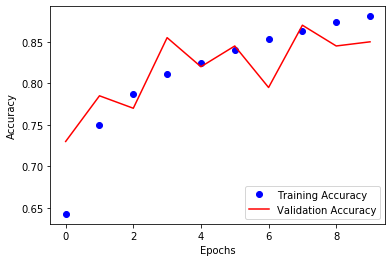

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(10) # 50 is the number of epochs
train_acc = history.history['acc']
valid_acc = history.history['val_acc']
print(train_acc)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()